<a href="https://www.kaggle.com/code/phantomking/stock-market-predictions-using-lstm-neural-network?scriptVersionId=154940312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stock Market Predictions using LSTM Neural Networks

# Introduction
The stock market. When a company undergoes the proccess of a IPO, they become part of the stock market. Not only is the stock market a large backing for the company itself, it's a large oppurtunity for earnings within the people who can buy and sell at different prices to earn money.

However, the stock market can be viotile and in many cases proper stock market prediction can take hours on hours of research and expierence into the company's current financial standings, current events, and many other factors. 

I don't want to do this, so I decided to throw my troubles to a machine learning model. But in all seriousness, a LSTM (Long Short Term Memory) is a version of neural network that is most optimised for stock predictions. Unlike a RNN (Recurrent Neural Network) which can only remember previous information through methods of backwards propergation, LSTM's can remember a lot more and therefore make more predictions which makes it ideal for stock market predictions as that is based on long-term trend.

I will be working off Yahoo Finances python libary which gives me stock data, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). I will visualise the data through matplotlib and seaborn. We will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also, like I said, be predicting future stock prices

Libary: https://github.com/ranaroussi/yfinance

No space here to explain LSTMs, however I highly recommend this kaggle project https://www.kaggle.com/code/kmkarakaya/lstm-output-types-return-sequences-state

## General Questions
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

# Setting up
Let's start by setting up and importing our data straight from the yfinance python libary that allows me to download straight into the project without using a cv file. 

In [1]:
!pip install yfinance --target=/kaggle/working/mysitepackages

# add to system path
import sys
sys.path.append('/kaggle/working/mysitepackages')

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/b1/67/aca1f6e215d957d24d0a290321f368503305480268f9617bf625243e9dea/pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.16.5 from https://files.pythonhosted.org/packages/64/41/284783f1014685201e447ea976e85fed0e351f5debbaf3ee6d7645521f1d/numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.6 MB/s eta 0:00:00
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining de

In [2]:
# Import and setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Yahoo finance reading setup
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Time stamps setup
from datetime import datetime

# Import and setup the stocks
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Setup the End and Start times for the data we download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # 1 Year back from today

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end) # Using globals() here is sloppy as hell but it's simply and it works so idrc-

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMAZON
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,AMAZON
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000,AMAZON
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800,AMAZON
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000,AMAZON
2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300,AMAZON
2023-12-12,145.520004,147.500000,145.300003,147.479996,147.479996,44944300,AMAZON


# Explore the data
Now that we've imported the data above, we can see that the data is numeric and the date is the index of the data. (Note: weekends are missing from the records)

Now, let's explore some of the basic features of the data

## Descriptive stats about the data
Let's use .describe() to generate statistics. These statistics include those that summarise the central tendency, dispersion, and shape excluding NaN.

Note: We only have 250 records per year because weekends are not included in the data.

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,169.400001,171.025418,168.073626,169.670757,169.209272,6.077959e+07
std,18.609766,18.433110,18.737266,18.580902,18.744799,1.851556e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,2.404830e+07
25%,154.475006,157.060005,153.805000,155.590004,154.961403,4.862100e+07
50%,173.789993,175.199997,172.580002,173.970001,173.736191,5.605830e+07
75%,183.555000,185.180000,181.970001,183.869995,183.380447,6.772255e+07
max,196.240005,198.229996,195.279999,197.960007,197.960007,1.601569e+08


Nice, we have access to the Open price, high price, low price, closing price, adjusted closing price and trade volume.

## Info about the data
the .info() method prints info about the dataframe including the index, columns, data types, non-null values, and memory usage

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-14 to 2023-12-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


We're working with mostly float values and a integer value for the Volume. No "special little snowflakes" that use weird data types, nice

# Visualise the data
Now, let's visualise the data for these different categories. This should help us determine which factors are important and should be considered as variables within our ML Model.

## Closing price
The closing price is the last price of the stock during the regular trading day. It's a standard benchmark used by investors to track preformance over time and shouldn't be violatile with major stocks like we're using here.

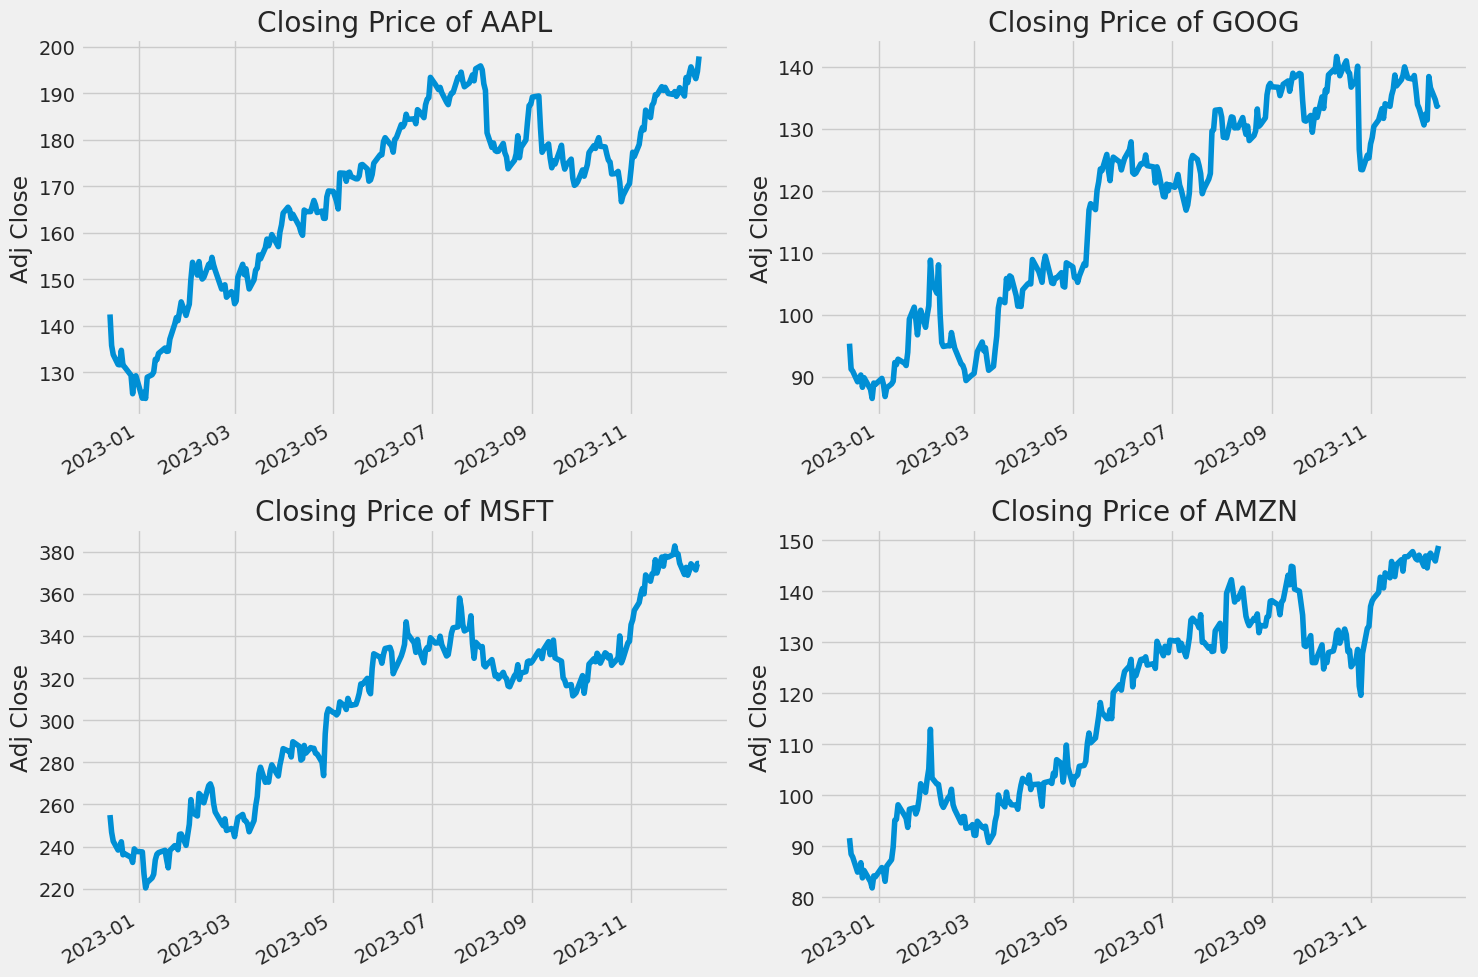

In [5]:
# Plot setup
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

# Placing data
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()

The above plots show the closing prices of different stocks over time. Each plot represents the closing price of a specific company's stock. The y-axis represents the adjusted closing price, which is a benchmark used by investors to track performance. The x-axis represents time.

From the plots, we can observe the following:

- The closing prices of all the stocks generally show an upward trend over time, indicating overall positive performance.
- There are fluctuations in the closing prices, indicating volatility in the stock market.
- The closing prices of some stocks show more significant fluctuations compared to others, suggesting differences in market performance and investor interest.
- The closing prices of all the stocks seem to follow similar patterns, indicating a correlation between the stock market as a whole.

By visualizing the closing prices, we can analyze the trends and fluctuations in the stock prices for each company. This data is a key part of our training data and is a great representation of a stock's preformance. Alternatively, we can calculate many different measurements of a stock's preformance using closing price.

## Trade Volume
Volume is how much a asset or secuirty changes hands over the course of (often) a day. Ie. how much the number of shares of secuirty traded between its daily open and close. This is important inputs for technical traders as it is a large asset for predicting future trends.

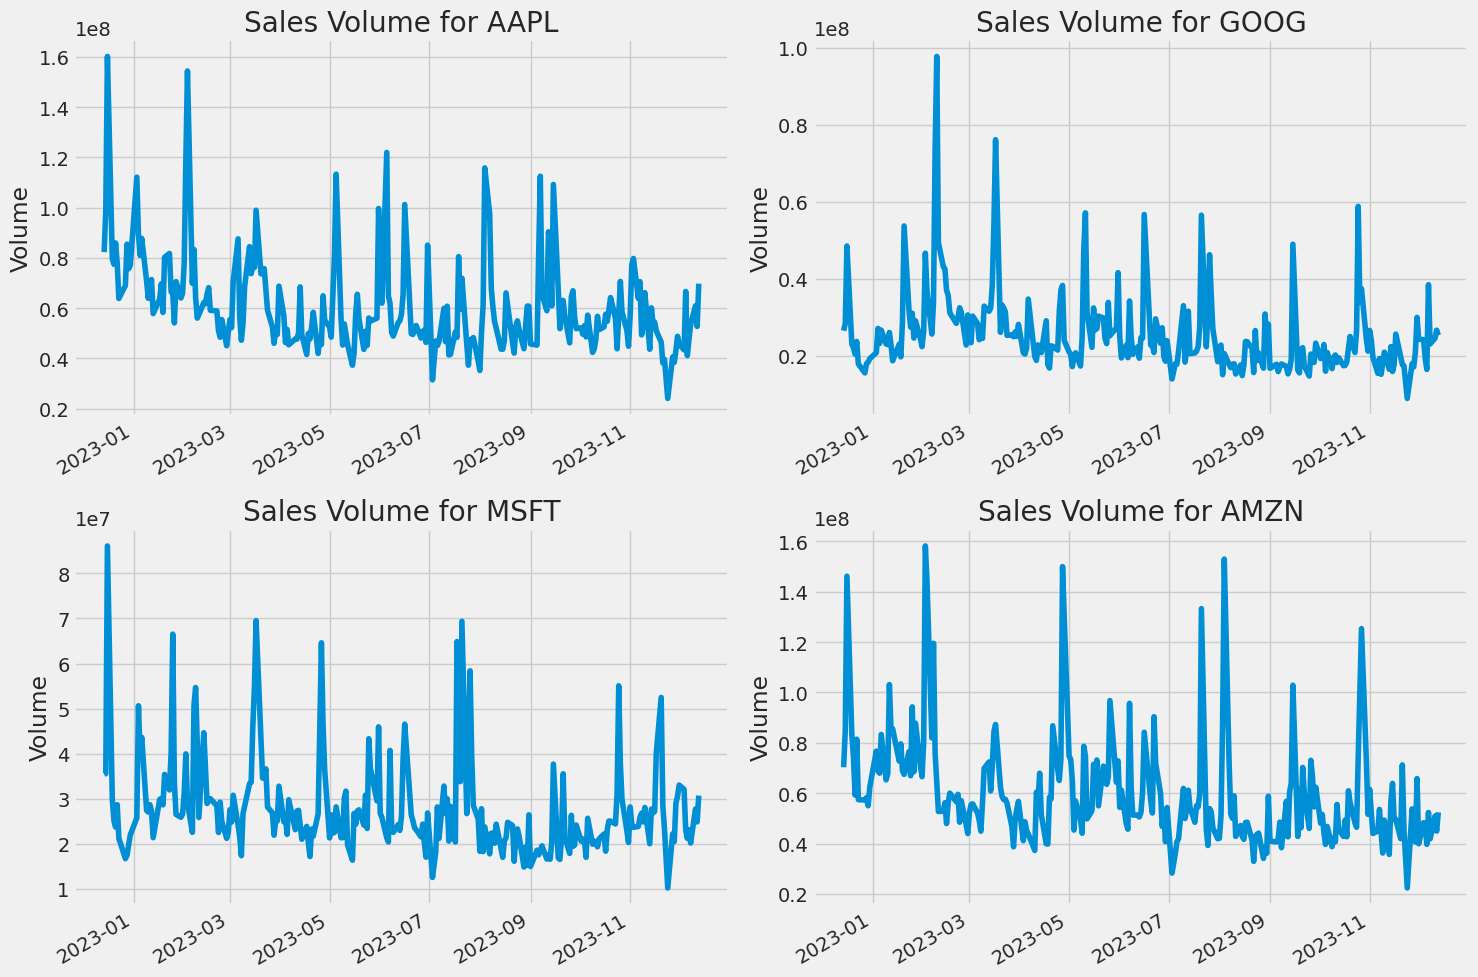

In [6]:
# Plot setup
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

# Placing data
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")
    
plt.tight_layout()

The above plots show the sales volume for different companies' stocks over time. Each plot represents the sales volume of a specific company's stock. The y-axis represents the volume, which indicates the number of shares of the security traded between its daily open and close. The x-axis represents time. 

From the plots, we can observe the following:

- The sales volume fluctuates over time for all companies.
- The sales volume for Apple (AAPL) stock shows a generally increasing trend over time, with some periods of high volume and others of low volume.
- The sales volume for Google (GOOG) stock shows a similar pattern to Apple, with fluctuations and periods of high and low volume.
- The sales volume for Microsoft (MSFT) stock also exhibits fluctuations, but with a generally increasing trend over time.
- The sales volume for Amazon (AMZN) stock shows a more erratic pattern, with periods of both high and low volume.

Overall, the sales volume plots provide insights into the trading activity and liquidity of each company's stock. High volume periods may indicate increased investor interest or market activity, while low volume periods may suggest decreased interest or stability in the market. Like said above, this is a valueable tool for a more technical analysis into the future trends of the stock.

## Moving Average of stocks
Moving average is a simple analysis tool that smooths out price data by creating a continously updated average price. (It's taken over a specific period of time like 10 days, 15 mins, 20 weeks, etc.)

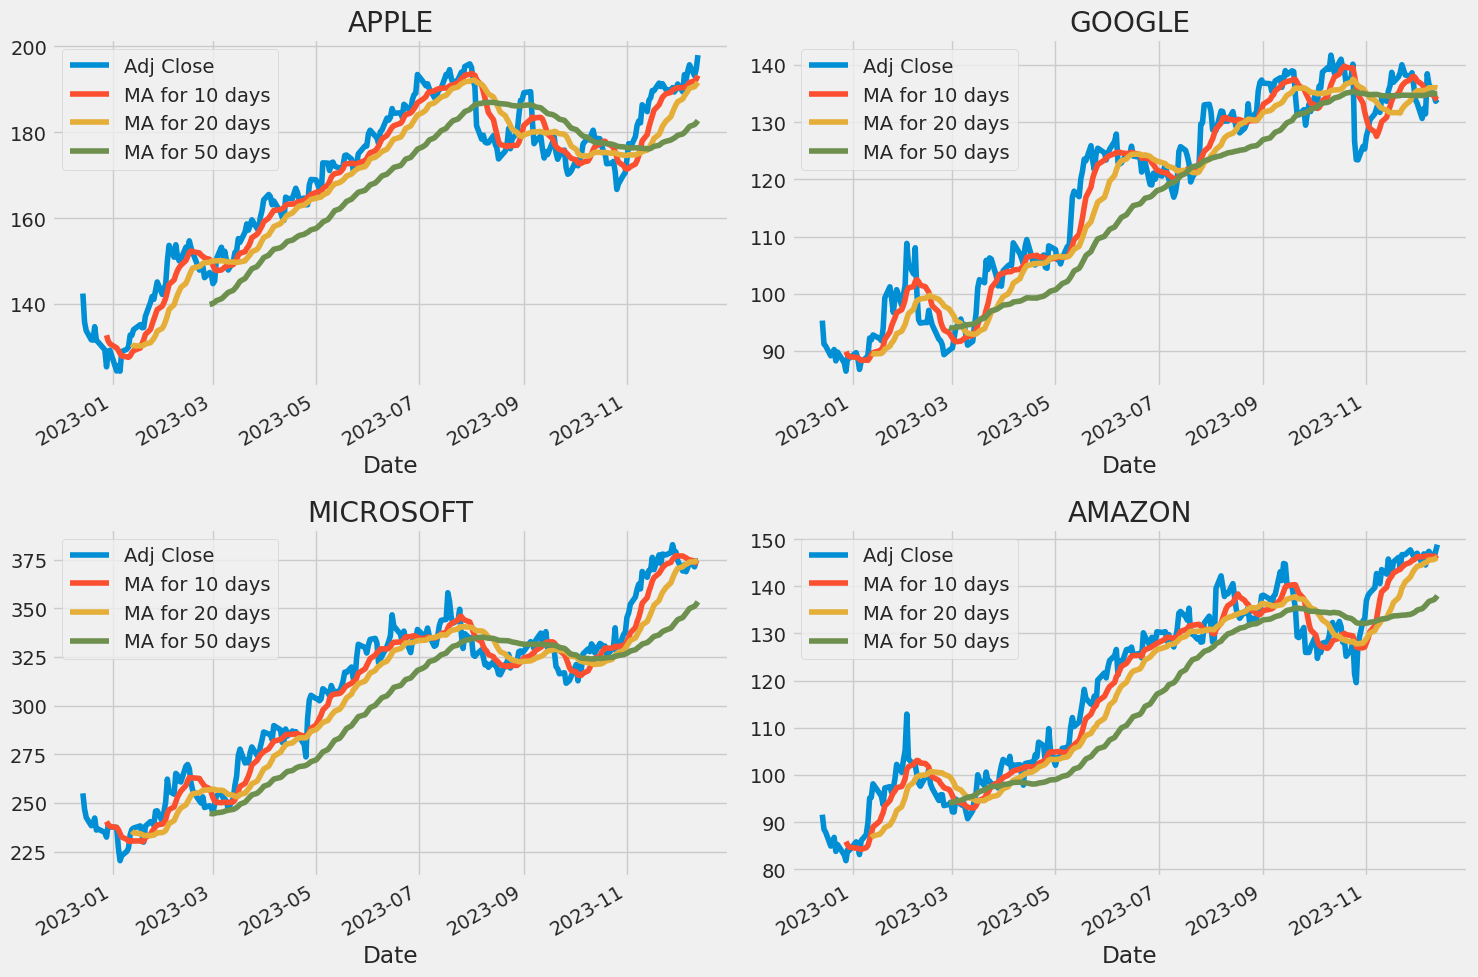

In [7]:
ma_day = [10, 20, 50]

# Setting data
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()
        

# Plotting Data
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

If we look at the graph, we can see that the best values to measure the moving average are 10 and 20 days as we can still capture the trends in the data without having noise affect the results.

## Daily return of the stock on average
Ok we've done some baseline analysis, let's dive a little deeper. 🤿 We're now gonna analyze the risk of the stock, and to do that we need to look closer at the daily changes of the stock, and not just the absolute value (or closing price). Let's use pandas to retrieve daily returns for the Apple stock.  

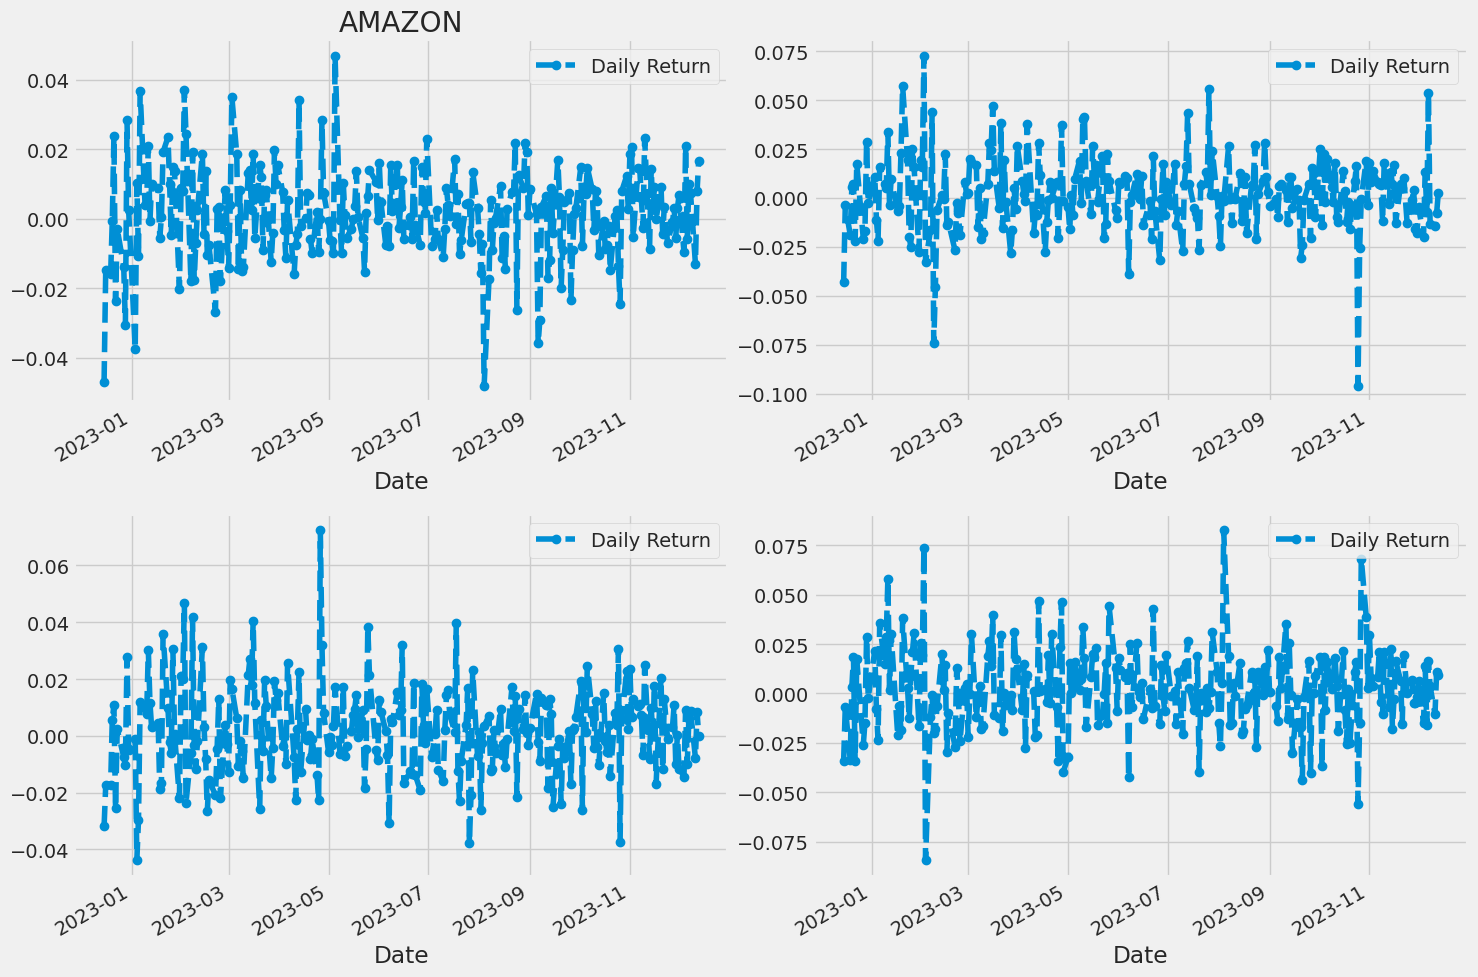

In [8]:
# Let's use pct_change to find the percent change
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
# Plot the daily return %
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0, 0], legend = True, linestyle = '--', marker = 'o')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0, 1], legend = True, linestyle = '--', marker = 'o')
axes[0, 0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1, 0], legend = True, linestyle = '--', marker = 'o')
axes[0, 0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1, 1], legend = True, linestyle = '--', marker = 'o')
axes[0, 0].set_title('AMAZON')

fig.tight_layout()

Okok nice, I didn't think that would work :p. Now, let's try get a overall look at the average daily return using a ✨histogram and kde plot✨ on the same figure. Seaborn hard carry time!

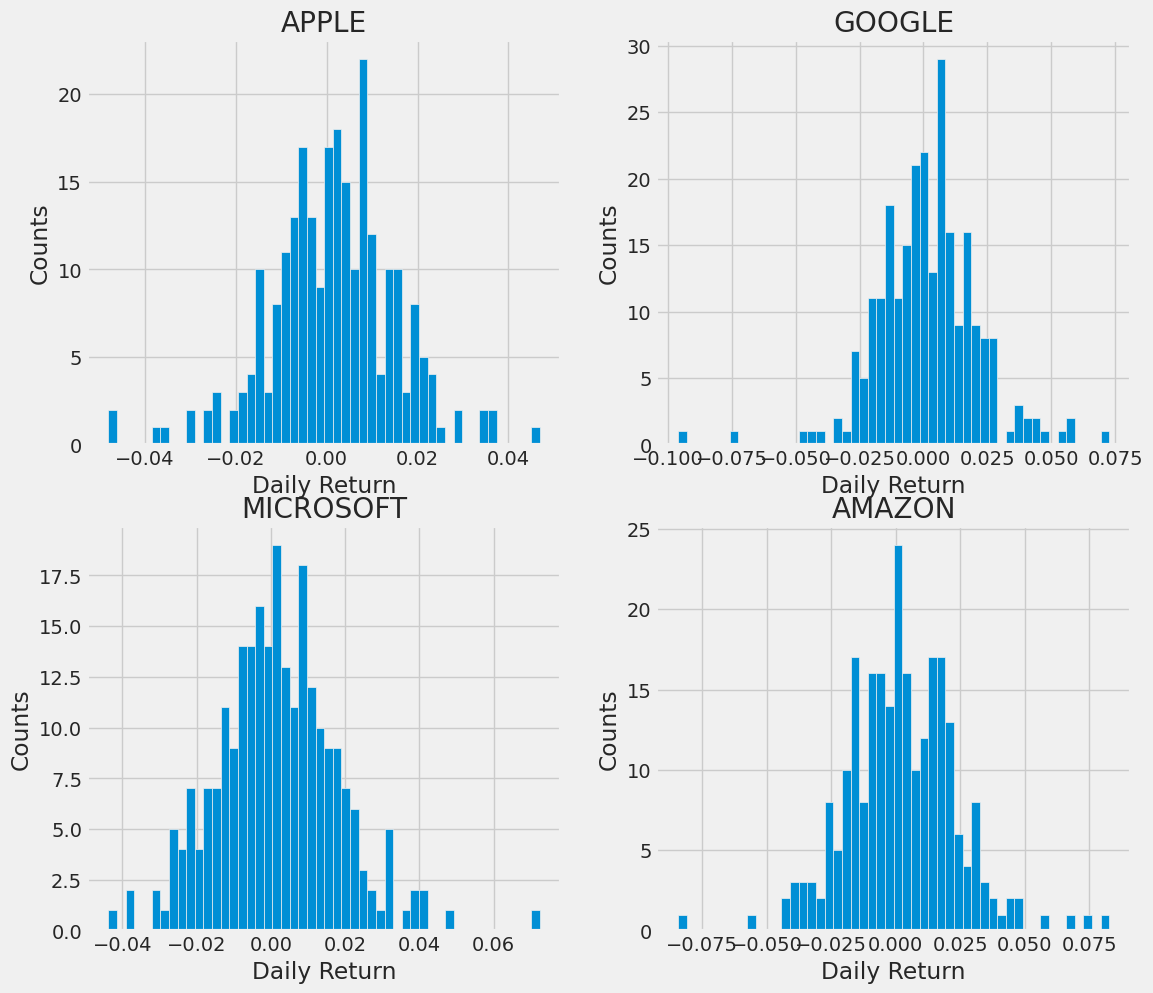

In [9]:
plt.figure(figsize = (12, 11))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f"{company_name[i-1]}")
    

Ok nice, the daily return value seems to be mostly within the 0.00 - 0.02 range. This doesn't really help with trainign our model but is interesting and helpful for risk analysis.

## What's the correlation (if any) between different stock's closing prices?

Correlation is smth that measures how much two variables are in relation with each other and has a value that must be between +-1.0. It measures association but doesn't really show whether x causes y or if the association is caused by another factor.

Let's analyze the returns of all stocks in our list (Amazon, Microsoft, Apple, google) for correlation. I'm gonna build a DataFrame w/ all the closing price columns for each of the stock's dataframes.

In [10]:
# Take all of the closing prices for the tech stocks into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

# Make a new Dataframe named tech returns
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-14,NaN,NaN,NaN,NaN
2022-12-15,-0.046854,-0.034178,-0.043122,-0.031918
2022-12-16,-0.014579,-0.006670,-0.003728,-0.017349
2022-12-19,-0.015910,-0.033462,-0.018820,-0.017328
2022-12-20,-0.000529,0.003180,0.005384,0.005614


Ok cool, now we can compare the daily percentage return of two stocks to check how they're correlated. First let's see a stock compared to itself.

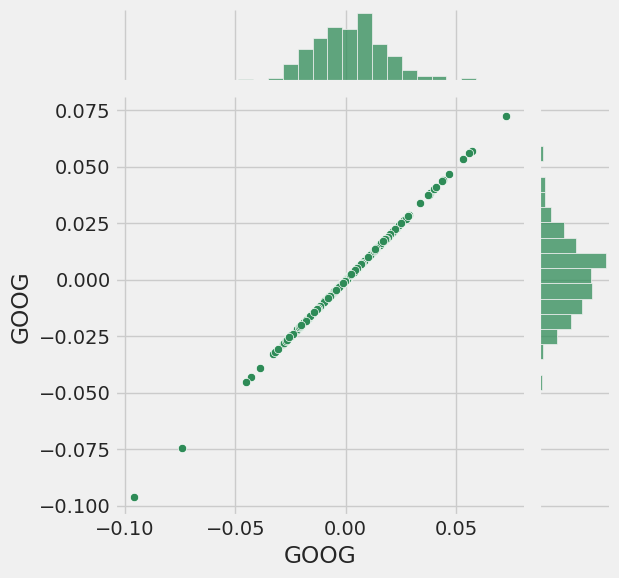

In [11]:
# Comparing google to itself should be a perfectly linear correlation
sns.jointplot(x = "GOOG", y = "GOOG", data = tech_rets, kind = "scatter", color = "seagreen")

Yep, it's linear. (Because if we plot y = x it's linear) This shows that the libary works. Now, let's use a jointplot to compare the daily returns of Google and Microsoft

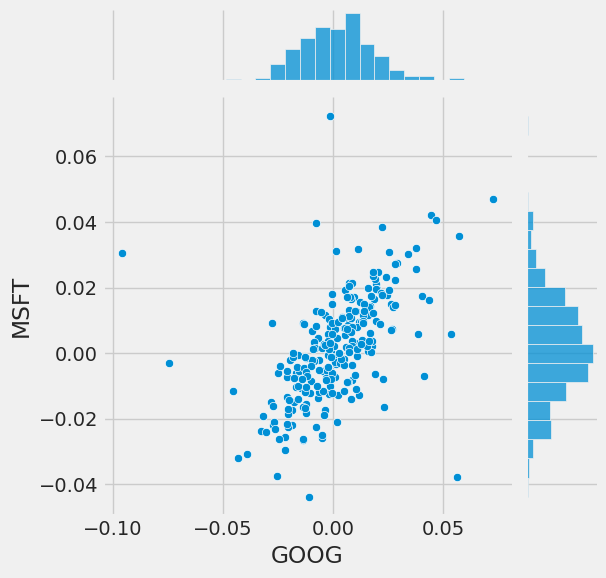

In [12]:
sns.jointplot(x = "GOOG", y = "MSFT", data = tech_rets, kind = "scatter")

Hm ok, there seems to be a positive correlation with each other and a linear relationship between it's daily return values should occur. This is of course valid because they're both big tech companies and it is likley their stock's are somewhat connected within the tech ecosystem.

Now we can use seaborn and pandas to repeat this comparison analysis for every possible combination of stocks in our list. (sns.pairplot)

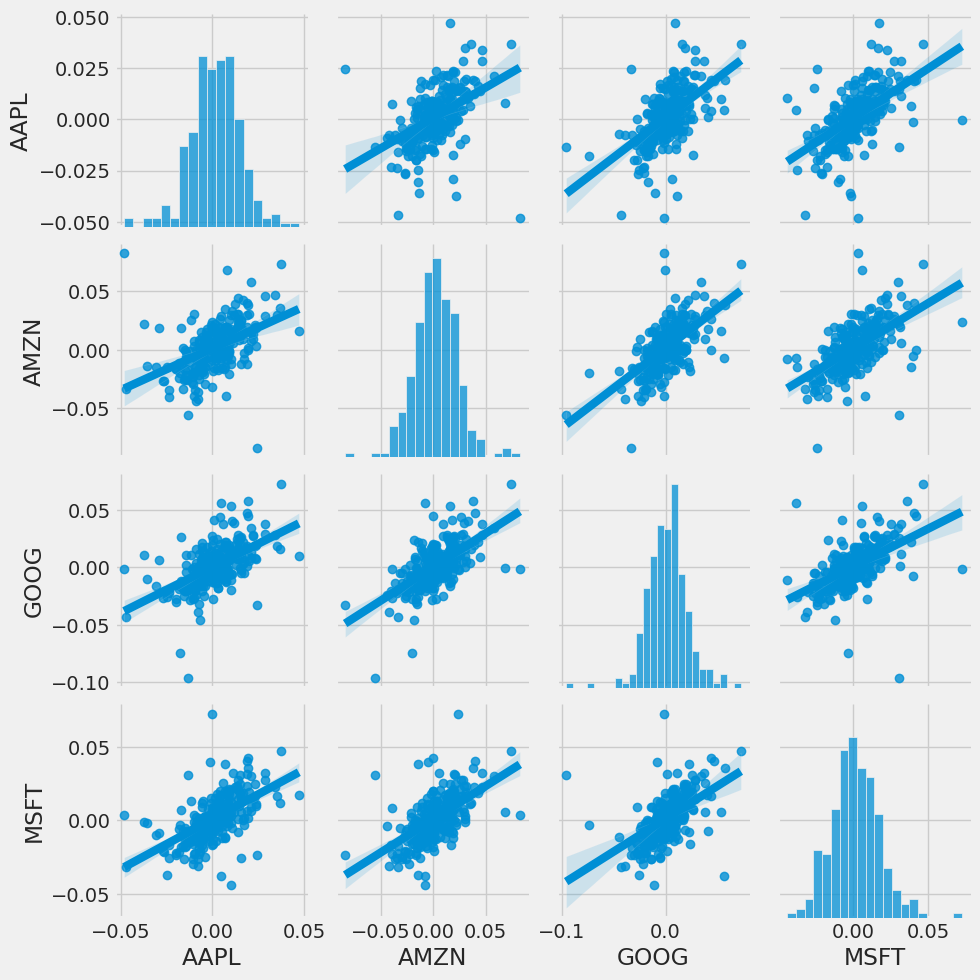

In [13]:
sns.pairplot(tech_rets, kind = 'reg')

Cool right? Above we can see all the relationships on daily returns between all the stocks. While there seems to be some sort of linear correlation between some of the stocks, the biggest correlation I can see here seems to be between Amazon and Google, it mght be interesting to investigate that individual comparison.

sns.pairplot() is god damn amazing and extremely easy for these plots. But we can also use sns.PairGrid() for full control of the figure itself and what kind of plots go to the diagonal, upper triangle and lower triangle. Here, let me show you (this is so cool)

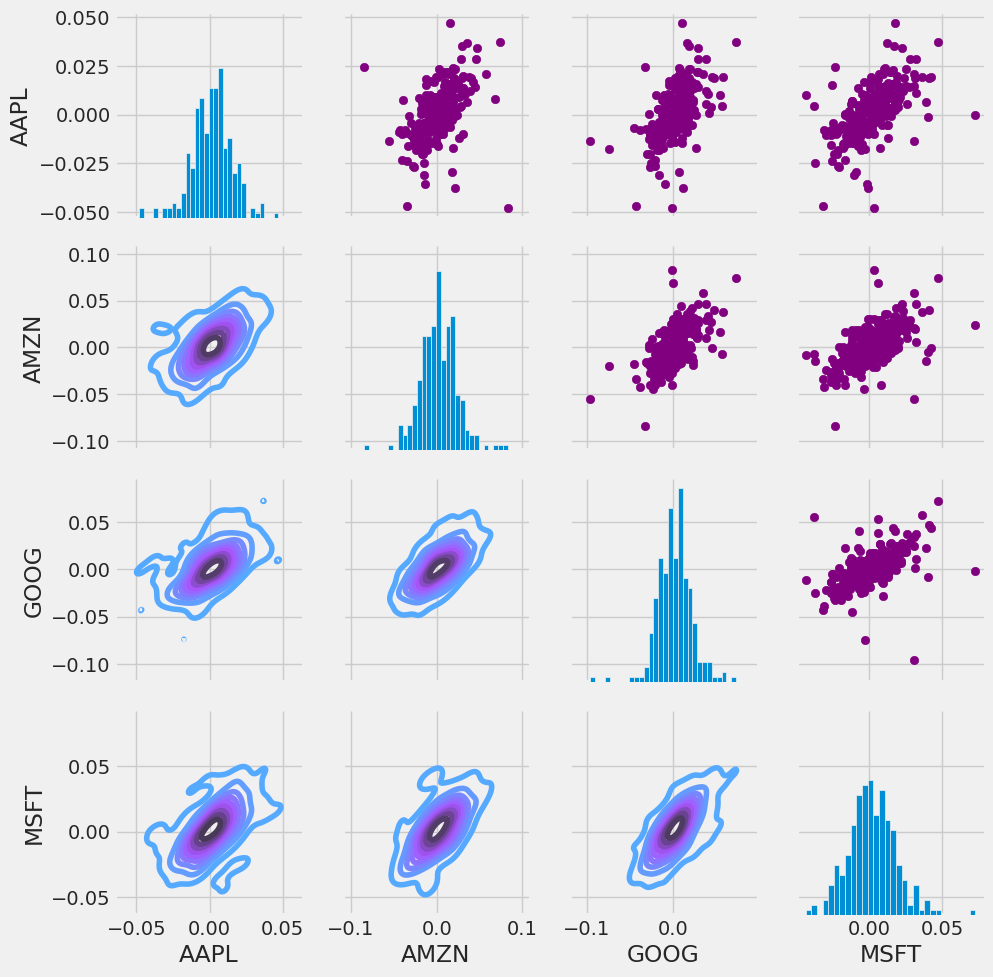

In [14]:
# Setup the figure by naming it returns_fig, and calling PairPlot on it
return_fig = sns.PairGrid(tech_rets.dropna())

# Let's use map_uper so we can specify the upper triangle
return_fig.map_upper(plt.scatter, color = "purple")

# Use map_lower so we can specifiy the lower triangle
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

#Now let's define the diagonal as histograms
return_fig.map_diag(plt.hist, bins = 30)

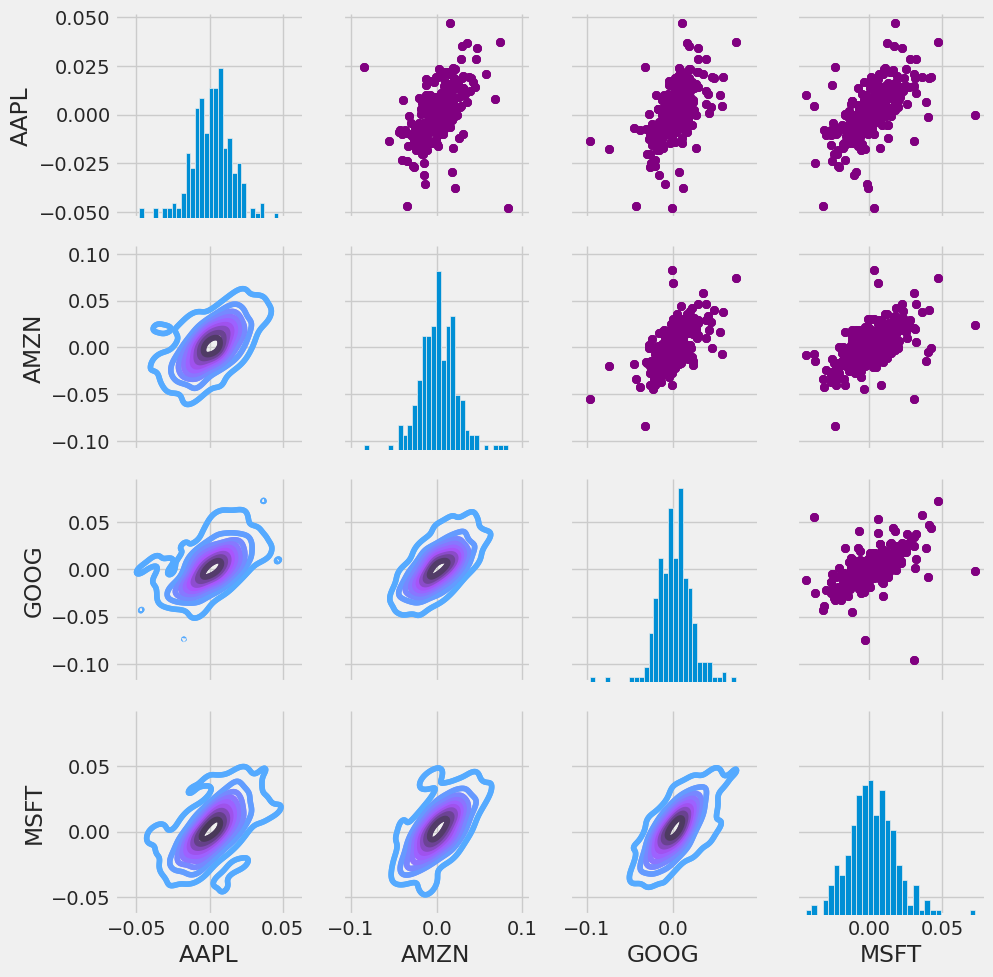

In [15]:
# Let's setup our figure by naming it return_fig then calling PairPlot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Let's use map_uper so we can specify the upper triangle
return_fig.map_upper(plt.scatter, color = "purple")

# Use map_lower so we can specifiy the lower triangle
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

#Now let's define the diagonal as histograms
return_fig.map_diag(plt.hist, bins = 30)

Finally, we can do a correlation plot to get actual numerical values for the correlation between the stock's daily return values. By comparing closing prices we can see a interesting relationship between Microsoft and Apple. 

Text(0.5, 1.0, 'Correlation of stock closing price')

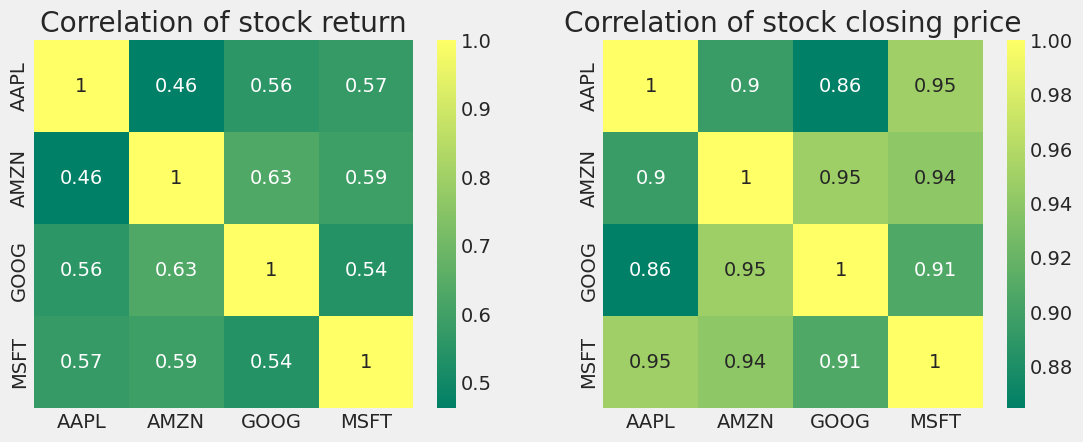

In [16]:
plt.figure(figsize = (12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = "summer")
plt.title("Correlation of stock return")

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot = True, cmap = "summer")
plt.title("Correlation of stock closing price")

Nice. As we suspected in or pairplot we see here numerically & visually that Microsoft and Apple had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

## How do we calculate risk when we invest in a particular stock?

There are many ways to quantify and calculate risk, one of the most basic ways (using our info on daily % returns) is by comparing the expected return w/ the standard deviation of the daily returns.

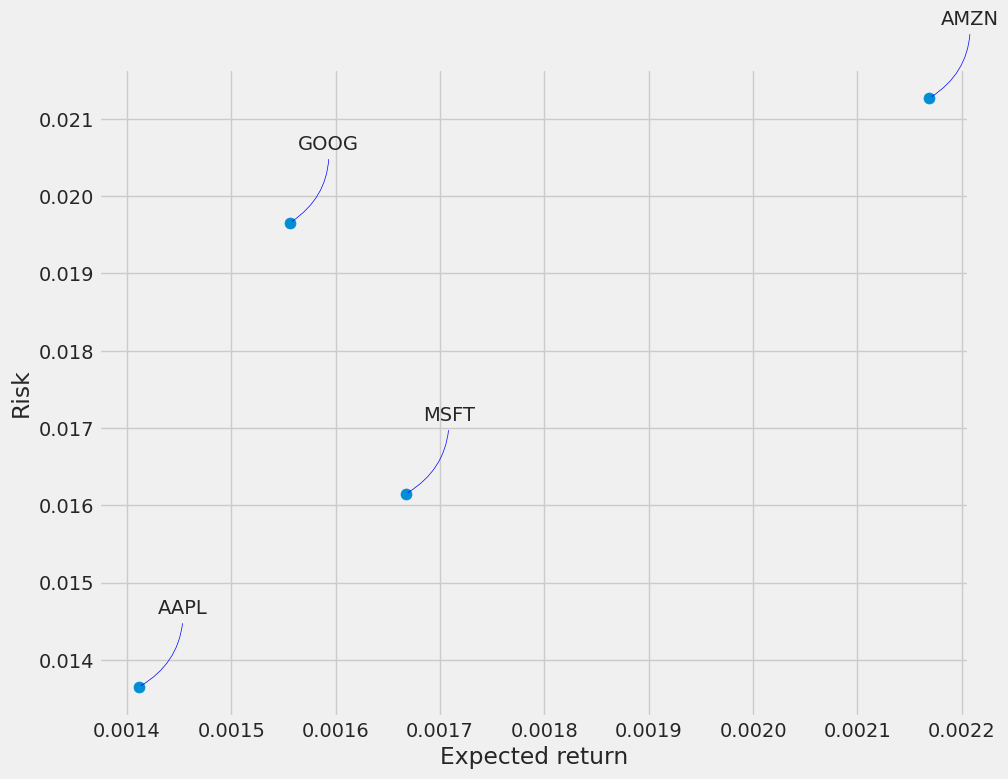

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize = (10, 8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    # Thanks to a random guy on github w/ a MIT license for these settings
    plt.annotate(label, xy = (x, y), xytext = (50, 50), textcoords = "offset points", ha = "right", va = "bottom", arrowprops = dict(arrowstyle = '-', color = "blue", connectionstyle = "arc3, rad=-0.3"))

# Predicting the closing price stock price of Apple:
Let's fetch the stock quote and do some machine learning using LSTM!

In [18]:
df = pdr.get_data_yahoo('AAPL', start = '2013-01-01', end = datetime.now()) # Fetch data from 2013 to now (10 years)

# Let's show the data
df 

# Note: As seen by the analysis above our data sets are pretty clean and we don't need to clean much! This is great

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769096,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557428,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001541,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044605,458707200
...,...,...,...,...,...,...
2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300
2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700


## Let's plot the data really quickly
This is so we have a refrence point for the future.


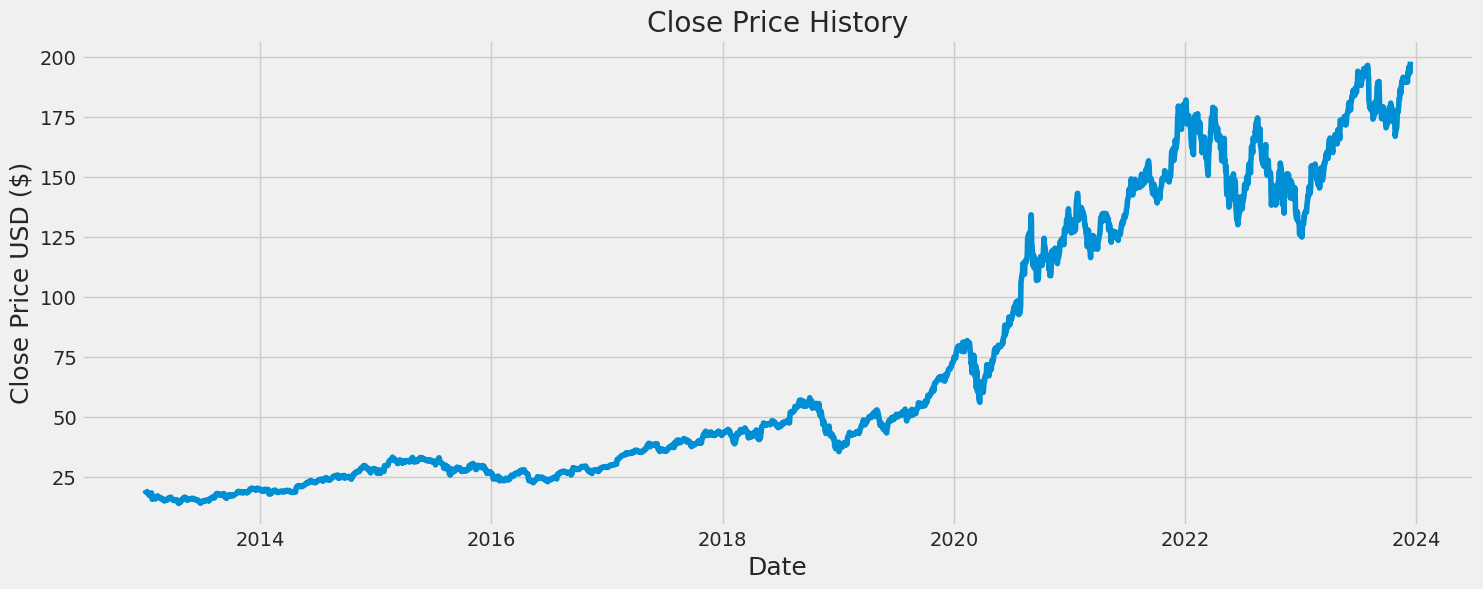

In [19]:
plt.figure(figsize = (16, 6))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

## Cool, now let's make our training and testing data sets
We will be training mostly based on the Closing data

Let's start by determining the length of the traiing set

We're using 95% of the data for training. Usually in most models you would have a 8-2 split but we have 9.5-0.5 split here. Why? Well usually AI Model training has little variation. A larger ratio between testing and training allows for more variation within testing. 

However, in stock data, there is already a lot of variation and since the data is linear **and** has a sense of "time", we want as recent training data as possible compared to our testing data to help with identifying trends.

Additionally, the neural network model we're using (LSTM) which stands for Long Short Term Memory benifits off the fact that it can "remember" previous data. Hense having larger datasets are more benifitial here as normal Neural networks like Convolutional Neural Networks are more likley to have bias to "recently" trained data.

In [20]:
# Create new dataframe
data = df.filter(['Close'])

# Conver to numpy array
dataset = data.values

# Get NO. of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))  # We're using 95% of the data for training

print(training_data_len)

2620


Now let's scale our dataset so our training data length fits as otherwise when we cut the data down to the 95-5 ratio it might have a few missing/incomplete datasets.

In [21]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.03076265]
 [0.02941764]
 [0.02648694]
 ...
 [0.97402343]
 [0.98233816]
 [1.        ]]


Let's create the training set based on the scaled training set

In [22]:
# Here we cut the data into the 95% And put it in a "train data" array
train_data = scaled_data[0:int(training_data_len), :]

# Split into x_train and y_train
x_train = []
y_train = []

# Isolate the "x_train" which is input data and "y_train" which is the output/target data. 
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61: # prevent overflow
        print(x_train)
        print(y_train)

# Convert into np arrays to allow for more manipulation of the dataset
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Reshape data so it's formatted correct and can be used for training.
print(x_train.shape) # Testing (ignore)

[array([0.03076265, 0.02941764, 0.02648694, 0.02588527, 0.02615893,
       0.02456549, 0.02580959, 0.02518657, 0.02158627, 0.01851388,
       0.02242859, 0.02176676, 0.02124662, 0.02217241, 0.02396576,
       0.01163935, 0.00957815, 0.01150931, 0.01314739, 0.01286791,
       0.01260784, 0.0122449 , 0.01005172, 0.01306394, 0.01296884,
       0.01507856, 0.01639058, 0.0173513 , 0.01501645, 0.01484371,
       0.0147622 , 0.01351422, 0.01348122, 0.01131911, 0.0107776 ,
       0.01169951, 0.01014489, 0.0113424 , 0.01048841, 0.00987316,
       0.0077518 , 0.00572943, 0.00788184, 0.00681825, 0.00777315,
       0.00799441, 0.00918804, 0.00735586, 0.00734034, 0.0081458 ,
       0.0103118 , 0.01265248, 0.01241376, 0.011946  , 0.01207216,
       0.01385387, 0.014178  , 0.01370443, 0.011946  , 0.01011771])]
[0.007449027317792206]
[array([0.03076265, 0.02941764, 0.02648694, 0.02588527, 0.02615893,
       0.02456549, 0.02580959, 0.02518657, 0.02158627, 0.01851388,
       0.02242859, 0.02176676, 0.02

Let's create the testing data set which is the last 5% of the stock data (Most recent)

We're testing this model using the same "input data" we trained the model on. This has no side affects on the bias and won't cause over-fitting as the model doesn't know the actual stock values after the training data ends.

We then use the model to predict the stock closing values for the last 5% of the data and compare it to y_test which is the actual stock closing values.

In [23]:
test_data = scaled_data[training_data_len - 60:, :] # Get the test data from the last 0.5% of the scaled data sets

# Create x_test and y_test
# "x_test" is the data we want to test the model on, "y_test" is the actual result of the data. 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert data to np array
x_test = np.array(x_test)

# Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Let's create and train our model using a LSTM Neural network to predict future stock prices
I'm using a 4 layer neural network with 2 LSTM and 2 Dense layers with adam optimiser along with MSE loss function for backwards propagation. 

Yes, these terms are complex. Use the kaggle link above to learn about LSTM's 

For a full course on neural networks that is extremely helpful and taught me everything from scratch: https://www.youtube.com/watch?v=KiW-W4v0nBo

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM 
# Import libaries requred

# Delete previous models
if 'model' in globals():
    del model
    
# Build model
model = Sequential()
# The model is a sequential model, meaning the dataset goes from a layer of the neural network to another.

# Adding layers
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# Adding our first LSTM layer
model.add(LSTM(64, return_sequences = False))
# Adding second LSTM layer
model.add(Dense(25))
# Adding dense layer (Dense layers are basically a crap ton of neurons and can help with idnetifiying patterns)
model.add(Dense(1))

# Compile model
model.compile(optimizer = "adam", loss = "mean_squared_error")
# This is where backwards probagation. I'm using the loss function of MSE which is used to compare target and predicted values and the adam optimiser to preform gradient decent which is used for backwards propagation. See the links above for a better explaination.

# Train model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)
# 1 Batch, 1 Epoch (1 Pass of the dataset)

2560/2560 [==============================] - 97s 36ms/step - loss: 0.0014


## Now let's text our model on the testing set

We use the RMSE function to calculate how accurate our data is
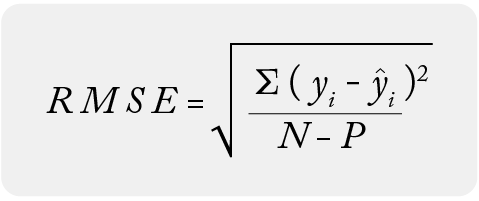

In [25]:
# We're using the model we trained above and testing it on our test data we made above
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Scaler transofmations so we can plot

rmse = np.sqrt(np.mean((predictions - y_test) ** 2)) # We calculated the RMSE using the formula 

print(rmse)

5/5 [==============================] - 1s 34ms/step
6.02782240304252


## Now, let's plot our data
RMSE value is useful, but it's just a number. Unless you're a AI (funny) you can't really interpret what it means. So let's graph it

We plot the training data first (The first 95% of the stock data)

For the remaining 5% We plot the actual stock values (Orange) and our predicted values (Yellow) based on the previous training data 

/tmp/ipykernel_19/2273220964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


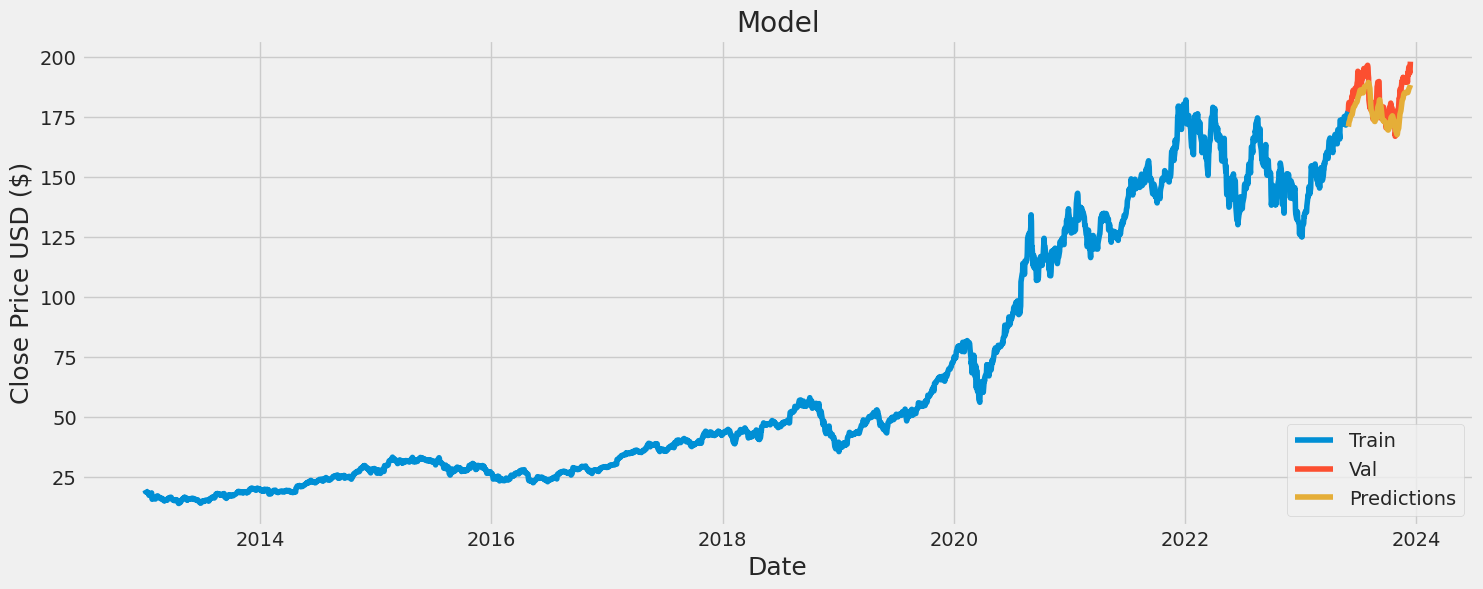

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize = (16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

Cool! Now we can see that our Predicted values and our actual values are incredibally similar! Let's zoom in. so we can see it clearer

/tmp/ipykernel_19/2148561818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


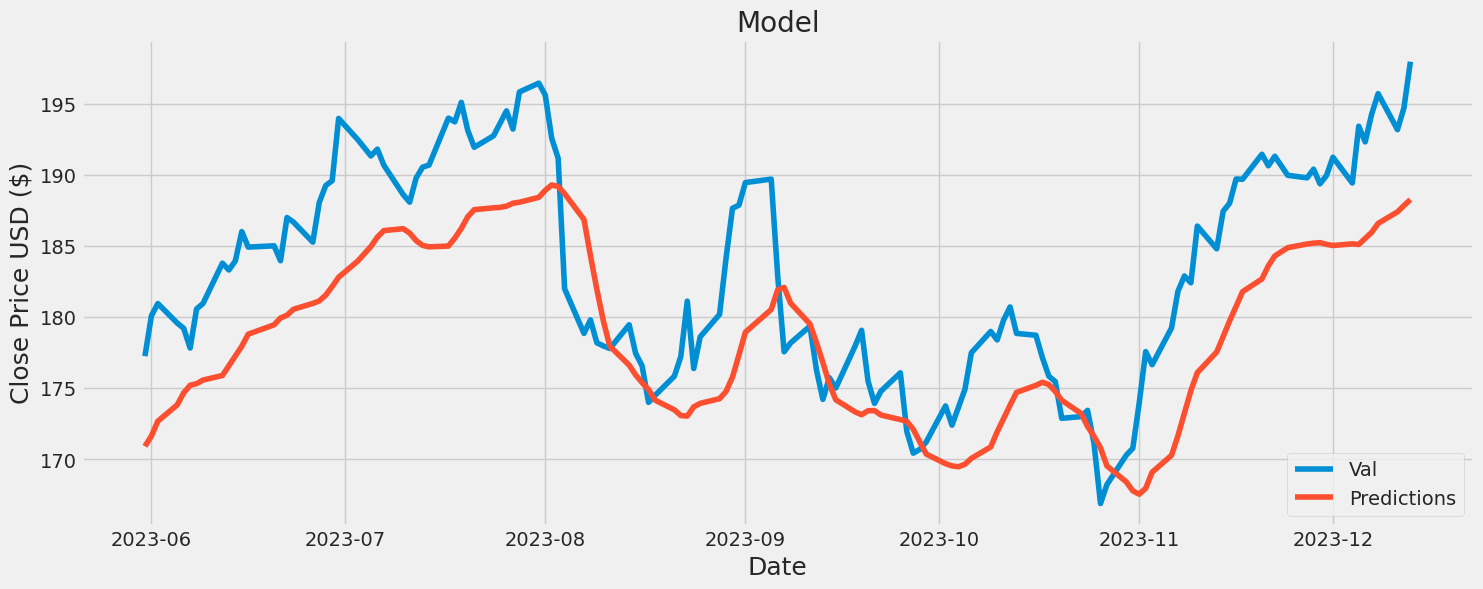

In [27]:
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize = (16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Val", "Predictions"], loc = "lower right")
plt.show()

## We managed to predict values that are almost the exact same as actual values!
The Blue line is the actual closing prices values during that time period, and the red line is the trend our AI Model predicted. The AI Model was not trained on the values meaning it fully predicted the orange line using previous data.

As we can see above, the predictions managed to get the general trend of the data correct, and that's already really good! See, with stocks, there are always some "noise" that cannot be eliminated, and the goal here was just to get the general trend and we acomplished that here! However, we still predicted the general trend in which stocks go in the future with only the past data, meaning that our AI Model works.


But...... can it be better

# Choosing between multiple optimisers 

The top optimisers for stock data are RMSProp and AdaDelta. Let's train our data with these optimisers as well and see which one's preform better.

In a nutshell, adam stands for Adaptive Moment Estimation, which describes the optimizer's method to update weights during training. The general idea behind Adam optimization is to adjust the learning rate adaptively for each parameter in the model based on the history of gradients calculated for that parameter.

RMSProp optimizer restricts the oscillations in the vertical direction. Therefore, it can increase the learning rate or the algorithm could take larger steps in the horizontal direction. In essense it combines momentum and gradient decent which allows it to be quick and effective.

AdaDelta is a better version of Adagrad, which was a very popular optimiser that adapts the learning rate for each parameter based on the historical gradients for that parameter. AdaDelta eliminates the need for the user to manually set a learning rate like in Adagrad. Instead, it uses a more sophisticated method to adaptively adjust the learning rate during the training process. This allows Adadelta to better handle the problem of diminishing learning rates and can therefore lead to improved training performance.

This website explains all of the optimizers in greater detail: https://keras.io/api/optimizers/

## First, let's train RMSProp

In [28]:
# Build model
modelRMS = Sequential()
# The model is a sequential model, meaning the dataset goes from a layer of the neural network to another.

# Adding layers
modelRMS.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# Adding our first LSTM layer
modelRMS.add(LSTM(64, return_sequences = False))
# Adding second LSTM layer
modelRMS.add(Dense(25))
# Adding dense layer (Dense layers are basically a crap ton of neurons and can help with idnetifiying patterns)
modelRMS.add(Dense(1))

# Compile model
modelRMS.compile(optimizer = "RMSprop", loss = "mean_squared_error")
# This is where backwards probagation. I'm using the loss function of MSE which is used to compare target and predicted values and the RMSprop optimiser to preform gradient decent which is used for backwards propagation. See the links above for a better explaination.

# Train model
modelRMS.fit(x_train, y_train, batch_size = 1, epochs = 1)
# 1 Batch, 1 Epoch (1 Pass of the dataset)

2560/2560 [==============================] - 98s 37ms/step - loss: 0.0017


## Next, let's train AdaDelta

In [29]:
# Build model
modelAda = Sequential()
# The model is a sequential model, meaning the dataset goes from a layer of the neural network to another.

# Adding layers
modelAda.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# Adding our first LSTM layer
modelAda.add(LSTM(64, return_sequences = False))
# Adding second LSTM layer
modelAda.add(Dense(25))
# Adding dense layer (Dense layers are basically a crap ton of neurons and can help with idnetifiying patterns)
modelAda.add(Dense(1))

# Compile model
modelAda.compile(optimizer = "Adadelta", loss = "mean_squared_error")
# This is where backwards probagation. I'm using the loss function of MSE which is used to compare target and predicted values and the Adadelta optimiser to preform gradient decent which is used for backwards propagation. See the links above for a better explaination.

# Train model
modelAda.fit(x_train, y_train, batch_size = 1, epochs = 1)
# 1 Batch, 1 Epoch (1 Pass of the dataset)

2560/2560 [==============================] - 99s 37ms/step - loss: 0.0880


## Now that all 3 models are trained, let's test them using the same dataset and see which one gives the better RMSE

In [30]:
# We're using the model we trained above and testing it on our test data we made above
predictionsadam = model.predict(x_test)
predictionsadam = scaler.inverse_transform(predictionsadam) # Scaler transofmations so we can plot

predictionRMS = modelRMS.predict(x_test)
predictionRMS = scaler.inverse_transform(predictionRMS) # Scaler transofmations so we can plot

predictionAda = modelAda.predict(x_test)
predictionAda = scaler.inverse_transform(predictionAda) # Scaler transofmations so we can plot

# Calculate rmse
rmseadam = np.sqrt(np.mean((predictionsadam - y_test) ** 2)) # We calculated the RMSE using the formula 
rmseRMS = np.sqrt(np.mean((predictionRMS - y_test) ** 2)) # We calculated the RMSE using the formula 
rmseAda = np.sqrt(np.mean((predictionAda - y_test) ** 2)) # We calculated the RMSE using the formula 

print(f"Adam RMSE {rmseadam}\n")
print(f"RMSProp RMSE {rmseRMS}\n")
print(f"AdaDelta RMSE {rmseAda}\n")

5/5 [==============================] - 1s 35ms/step
Adam RMSE 6.02782240304252

RMSProp RMSE 14.632656966498214

AdaDelta RMSE 97.76302079067034



## Let's plot
Hm ok RMSE shows adam is much better, but maybe there's a outlier? Let's plot it and see for ourselves

/tmp/ipykernel_19/3684495849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictionsadam'] = predictionsadam
/tmp/ipykernel_19/3684495849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PredictionsRMS'] = predictionRMS
/tmp/ipykernel_19/3684495849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

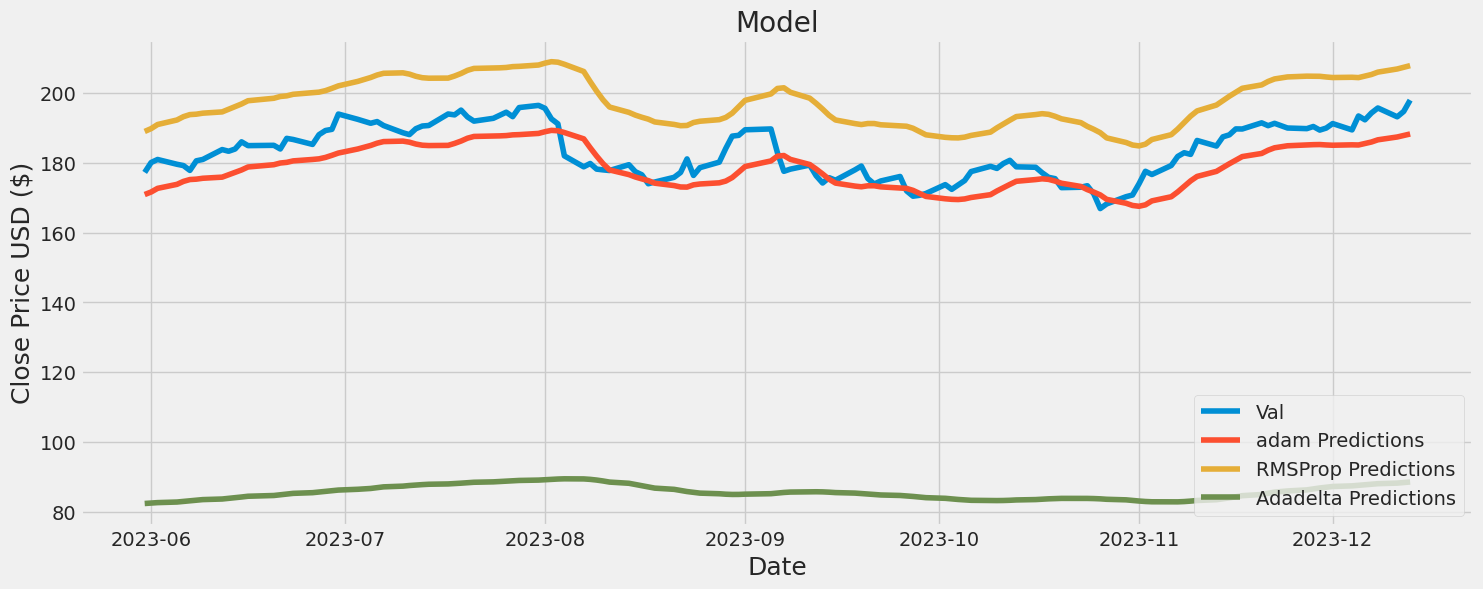

In [31]:
valid = data[training_data_len:]
valid['Predictionsadam'] = predictionsadam
valid['PredictionsRMS'] = predictionRMS
valid['PredictionsAda'] = predictionAda

# visualize data
plt.figure(figsize = (16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

plt.plot(valid[["Close", "Predictionsadam", "PredictionsRMS", "PredictionsAda"]])
plt.legend(["Val", "adam Predictions", "RMSProp Predictions", "Adadelta Predictions"], loc = "lower right")
plt.show()

Hm ok, as we can see Adadelta is a huge outlier. Let's plot it without it so we can interpret the trends for the other two optimisers

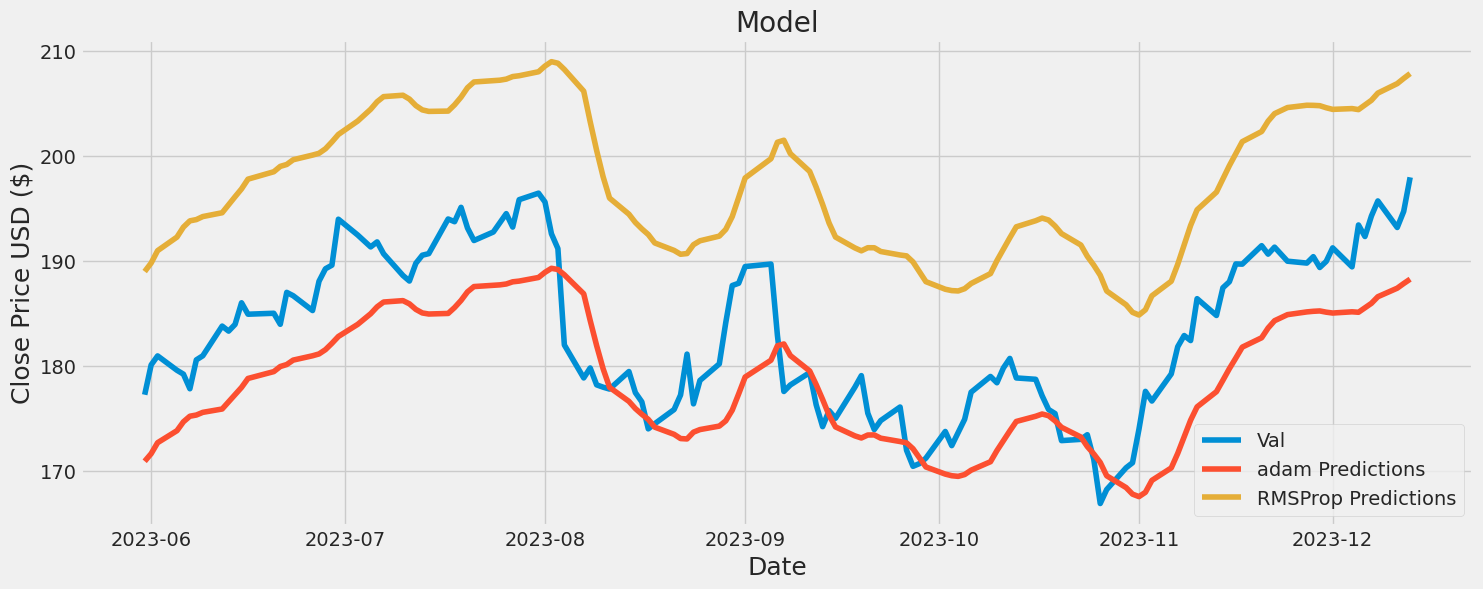

In [32]:
plt.figure(figsize = (16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

plt.plot(valid[["Close", "Predictionsadam", "PredictionsRMS"]])
plt.legend(["Val", "adam Predictions", "RMSProp Predictions"], loc = "lower right")
plt.show()

As we can see from both the RMSE and the graph adam is a lot more accurate at predicting the values. The blue line is the actual values of the stock. The AI is **not** trained on that data and is predicting it fully based on the previous stock data

# Conclusion
In this notebook I did some data analysis and visualisation on the 4 top tech stocks and discovered some trends there while also concluding which stocks have the least risk in investment. Then I used a LSTM Model to predict Apple stocks. I tested adam, RMSProp and AdaDelta optimisers to see which one's has most accurate prediction, and determined that the adam optimiser is ideal for stock predictions.

In the end, I created a Neural Network that can accurately predict future stock values as seen by the above graph. Also, we found from our data analysis above that there was a strong correlation between the Microsoft stock and the Apple stock we just predicted. This means that the trends identified within our model can be applied to Microsoft's stock as well!

Speaking of data analisys, the visual representations of the risk of each stock depicted above can help identify the risk for each of the stocks, and can help us decide whether or not it is worth following the trend identified by the AI no matter it's accuracy before. This is because stocks can sometimes be unstable and stray outside trends, and identifiying each stock's risk factor as we have helps us decide as humans whether the investment is worth it no matter the trend identified by the Neural Network.

Many Thanks to Mr. Nolan for helping me through this journey along with the hundreds of stackoverflow articles and youtube videos that taught me all that I know.